<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/DT_Pruning_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

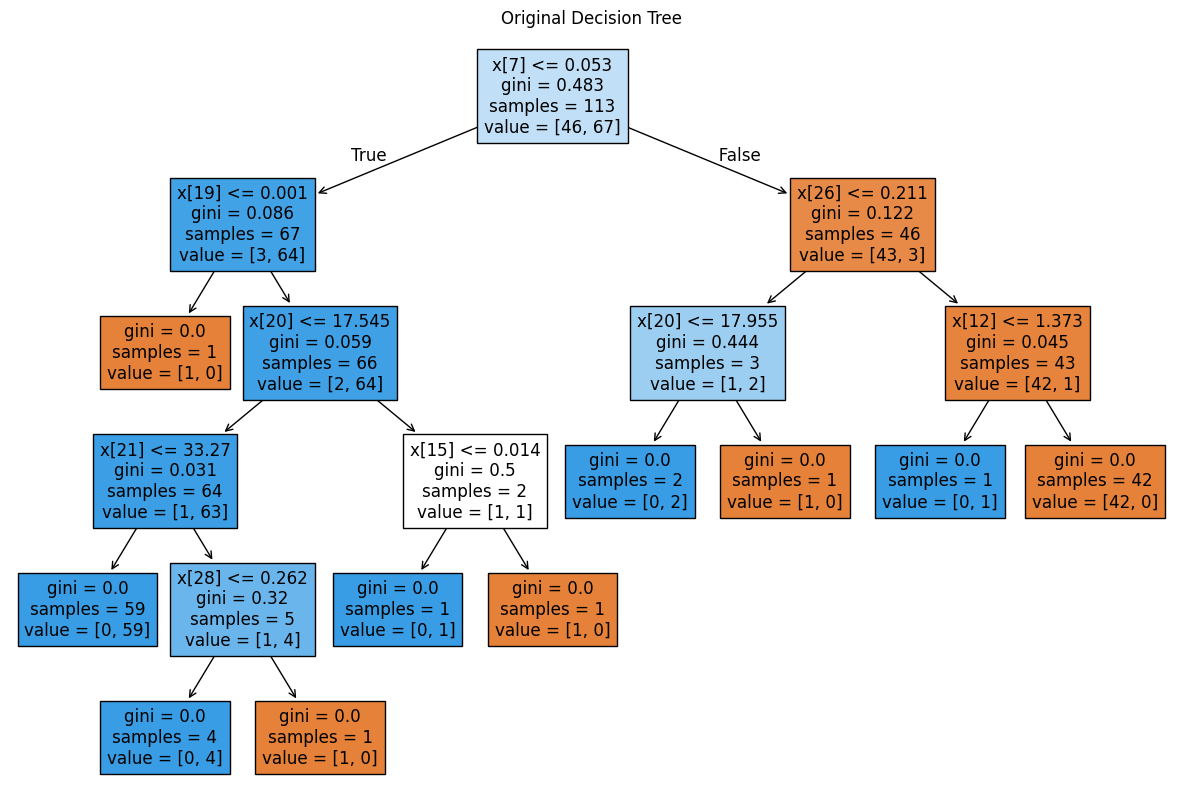

Accuracy before pruning: 0.8991228070175439


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Separating Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

# Train decision tree model
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Plot original tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True)
plt.title("Original Decision Tree")
plt.show()

# Model Accuracy before pruning
accuracy_before_pruning = model.score(X_test, y_test)
print("Accuracy before pruning:", accuracy_before_pruning)

This code snippet demonstrates the initial steps of building and evaluating a Decision Tree Classifier without any pruning techniques.

*   **Imports**: It imports necessary libraries like `load_breast_cancer` for the dataset, `train_test_split` for data partitioning, `DecisionTreeClassifier` for the model, `plot_tree` for visualization, and `matplotlib.pyplot` for plotting.
*   **Data Loading**: `load_breast_cancer(return_X_y=True)` loads the breast cancer dataset, separating features (`X`) from target labels (`y`).
*   **Data Splitting**: `train_test_split` divides the data into training (20%) and testing (80%) sets, ensuring reproducibility with `random_state=42`.
*   **Model Training**: A `DecisionTreeClassifier` is initialized with `criterion="gini"` (using Gini impurity) and then trained (`model.fit`) on the training data (`X_train`, `y_train`).
*   **Tree Visualization**: `plt.figure()` and `plot_tree()` are used to create and display a visual representation of the trained decision tree, with nodes filled to indicate class distribution.
*   **Accuracy Evaluation**: `model.score(X_test, y_test)` calculates and prints the accuracy of this unpruned model on the unseen test data, providing a baseline performance metric.

#Decision Tree Pre-Pruning Implementation


#Decision Tree Pruning
Decision tree pruning is a technique used in machine learning to reduce the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning helps to prevent overfitting and improve the tree's ability to generalize to unseen data. There are two main types of pruning:

#Pre-pruning (or Early Stopping):

This technique stops the tree building process early, before it has fully grown.
It involves setting constraints during the tree construction phase, such as:
max_depth: The maximum depth of the tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
max_features: The number of features to consider when looking for the best split.
The idea is to stop adding more nodes if the gain from splitting a node is not significant enough or if a certain complexity limit is reached.
Pre-pruning can be less effective than post-pruning because it's hard to decide on optimal stopping criteria beforehand.
Post-pruning (or Backward Pruning):

In this approach, the decision tree is first grown to its full potential (or until a very large size).
Then, sub-nodes and branches are systematically removed from the fully grown tree, usually from the bottom up.
The removal process is guided by evaluating the impact of pruning on a validation dataset or using statistical tests (like chi-square or error reduction).
A common post-pruning technique is Cost-Complexity Pruning (CCP), also known as weakest link pruning. It works by finding a sequence of nested pruned trees, each optimal for a specific value of a regularization parameter alpha (cost-complexity parameter). The alpha value determines the trade-off between the tree's complexity and its accuracy on the training data. A higher alpha results in more pruning.
The best pruned tree is then typically selected by evaluating the performance of these trees on a separate validation set (or cross-validation).

#Why Prune?

Reduces Overfitting:
Unpruned trees can become very complex, learning the noise in the training data rather than the underlying patterns. Pruning simplifies the tree, making it less prone to overfitting.
Improves Generalization: A simpler, pruned tree often performs better on new, unseen data.
Increases Interpretability: Smaller trees are easier for humans to understand and interpret.
Reduces Computational Cost: Smaller trees require less computation for both training and prediction.

In [4]:
from sklearn.tree import DecisionTreeClassifier
parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt','log2']
}
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,param_grid = parameter,cv = 5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']})

This code block focuses on performing **pre-pruning** on a Decision Tree Classifier using `GridSearchCV` to find the best hyperparameters.

*   **`from sklearn.tree import DecisionTreeClassifier`**: Imports the `DecisionTreeClassifier` class.
*   **`parameter = { ... }`**: Defines the **hyperparameter grid** for `GridSearchCV`, including `criterion`, `splitter`, `max_depth`, and `max_features`.
*   **`model = DecisionTreeClassifier()`**: Creates an instance of the `DecisionTreeClassifier` as the base estimator.
*   **`from sklearn.model_selection import GridSearchCV`**: Imports the `GridSearchCV` class for hyperparameter tuning.
*   **`cv = GridSearchCV(model, param_grid = parameter, cv = 5)`**: Initializes `GridSearchCV` with the model, the parameter grid, and 5-fold cross-validation.
*   **`cv.fit(X_train, y_train)`**: Executes the grid search, training multiple models with different hyperparameter combinations on the training data and evaluating them using cross-validation to find the best performing set of hyperparameters.

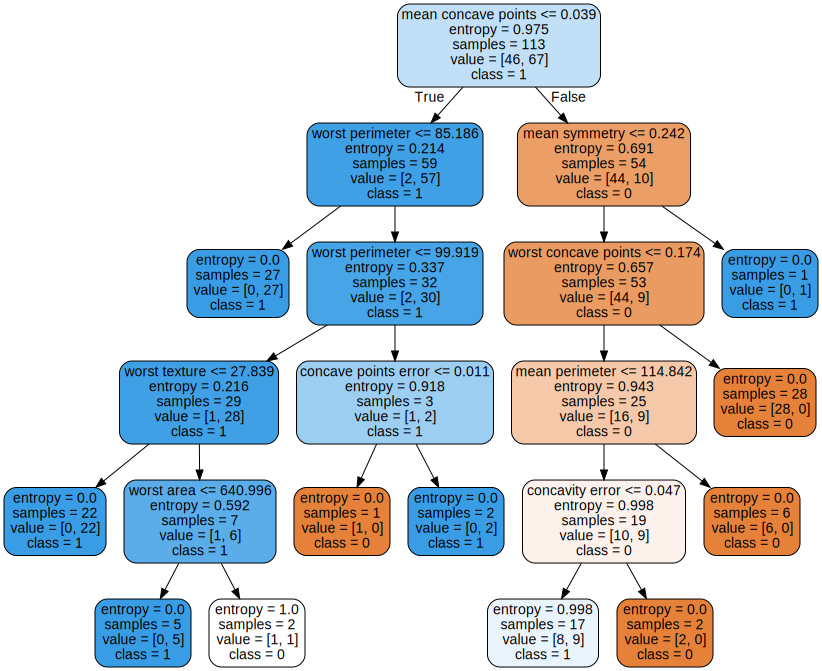

In [6]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.datasets import load_breast_cancer

best_estimator = cv.best_estimator_
# Get feature names from the dataset
feature_names = load_breast_cancer().feature_names

dot_data = export_graphviz(best_estimator, out_file=None, filled=True, rounded=True,
feature_names=feature_names, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png', cleanup=True)
graph

Certainly! This code block focuses on visualizing the best decision tree model found by the GridSearchCV process. Let's break it down:

from sklearn.tree import export_graphviz: This imports the export_graphviz function from scikit-learn, which is used to convert a trained DecisionTreeClassifier into the Graphviz DOT language format.

#import graphviz:
 This imports the graphviz library, which is a Python interface for Graphviz, a graph visualization software. It allows us to render DOT language descriptions into visual diagrams.

from sklearn.datasets import load_breast_cancer: This imports the load_breast_cancer function, which is used here to get the feature names from the dataset to make the tree visualization more readable.

#best_estimator = cv.best_estimator_:
After GridSearchCV (cv) has been run, it stores the best performing model (the one with the best hyperparameters) in its best_estimator_ attribute. This line retrieves that optimal decision tree model.

feature_names = load_breast_cancer().feature_names: This line obtains the names of the features from the breast_cancer dataset. These names will be used to label the decision nodes in the visualized tree, making it easier to understand which feature is being split at each node.

dot_data = export_graphviz(best_estimator, out_file=None, filled=True, rounded=True, feature_names=feature_names, class_names=['0', '1']): This is the core line for generating the DOT representation of the tree.

#best_estimator:
The decision tree model to visualize.

#out_file=None:
 Specifies that the output should be returned as a string rather than written to a file directly.

filled=True: Colors nodes to indicate the majority class for classification, improving visual clarity.
rounded=True: Draws node boxes with rounded corners.
feature_names=feature_names: Provides the list of feature names to label the splitting criteria at each node.
class_names=['0', '1']: Provides labels for the target classes, which appear at the leaf nodes (e.g., '0' for benign, '1' for malignant).
graph = graphviz.Source(dot_data): This creates a graphviz.Source object from the generated DOT language string (dot_data). This object can then be used to render the graph.

graph.render("decision_tree", format='png', cleanup=True): This line renders the graph object to an image file.

#"decision_tree":
The base name for the output file (e.g., decision_tree.png).
format='png': Specifies the output image format as PNG.
cleanup=True: Removes the intermediate DOT file generated by Graphviz after the image is created.
graph: In a Jupyter/Colab environment, simply having the graph object as the last expression in a cell will cause it to be displayed as an SVG or PNG output directly in the notebook output.

In [8]:
cv.score(X_test,y_test)
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [9]:
# Cost-complexity pruning (Post-pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a series of decision trees with different alpha values
pruned_models = []
for ccp_alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(criterion="gini", ccp_alpha=ccp_alpha)
    pruned_model.fit(X_train, y_train)
    pruned_models.append(pruned_model)

# Find the model with the best accuracy on test data
best_accuracy = 0
best_pruned_model = None
for pruned_model in pruned_models:
    accuracy = pruned_model.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_model = pruned_model
# Model Accuracy after pruning
accuracy_after_pruning = best_pruned_model.score(X_test, y_test)
print("Accuracy after pruning:", accuracy_after_pruning)

Accuracy after pruning: 0.918859649122807


### Cell `wcN4sQS8__0C`: Original Decision Tree Model Training and Evaluation

This cell initializes and trains a basic Decision Tree Classifier without any pruning. It loads the breast cancer dataset, splits it into training and testing sets, trains a `DecisionTreeClassifier` using the Gini impurity criterion, visualizes the resulting tree, and calculates its accuracy on the test set. This provides a baseline performance before applying pruning techniques.

### Cell `BnI_qwDSAGbK`: Decision Tree Pre-Pruning Implementation

This is a markdown header indicating the start of the section on pre-pruning for decision trees.

### Cell `-uCU30WDAAV6`: Decision Tree Pre-Pruning with GridSearchCV

This cell performs hyperparameter tuning for a `DecisionTreeClassifier` using `GridSearchCV`. It defines a parameter grid with various options for `criterion`, `splitter`, `max_depth`, and `max_features`. `GridSearchCV` systematically explores all combinations of these parameters, training a model for each combination and evaluating it using 5-fold cross-validation on the training data (`X_train`, `y_train`). The goal is to find the best set of hyperparameters that optimizes model performance (pre-pruning).

### Cell `UR2nfQnOAI6I`: Visualize Best Pre-Pruned Tree

This cell visualizes the best decision tree model found by the `GridSearchCV` process. It uses `export_graphviz` to convert the `best_estimator_` (the best model from `cv`) into a DOT language string. This string is then rendered by `graphviz` to produce a visual representation of the decision tree, saved as `decision_tree.png`, and displayed in the output. The `feature_names` from the original dataset are used to label the decision nodes, making the tree interpretable.

### Cell `SnDNG1FPA63p`: Evaluate Best Pre-Pruned Model

This cell evaluates the performance of the best pre-pruned model identified by `GridSearchCV` on the independent test set (`X_test`, `y_test`). It prints the accuracy score of this model and also displays the `best_params_`, which are the specific hyperparameter values that led to the highest performance during the grid search.

### Cell `oHWMAcdMBO_I`: Cost-Complexity Pruning (Post-Pruning)

This cell implements post-pruning using the cost-complexity pruning (CCP) method. It first calculates the `ccp_alphas` (effective alphas) for the `model` using `cost_complexity_pruning_path` on the training data. Then, it trains a series of `DecisionTreeClassifier` models, each with a different `ccp_alpha`. Finally, it iterates through these pruned models to find the one that yields the highest accuracy on the test data (`X_test`, `y_test`), and prints this `accuracy_after_pruning`. This process helps in finding a simpler tree that generalizes better to unseen data.